# Projeto de Análise de Dados referente ao ENEM 2019
### Este projeto foi desenvolvido durante a 2ª Edição da Imersão de Dados promovido pela Alura

In [1]:
#importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-deep')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#importando os dados 
dados = pd.read_csv('dataset.csv')

In [3]:
#retorna a quantidade de linhas e colunas da amostra
dados.shape

(127380, 136)

In [4]:
#retorna uma resumo dos dados coletados
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,123757.000000,...,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000
mean,1.900035e+11,2019.0,3.086067e+06,30.709389,22.094355,1.076841,2.131198,1.029345,3.058310e+06,30.431103,...,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068
std,1.469535e+06,0.0,9.961399e+05,9.931060,7.498707,0.440671,1.017373,0.202790,9.827584e+05,9.793934,...,109.416939,0.499402,0.777411,33.250346,42.786693,40.030347,37.953250,59.380566,188.076455,1.475714
min,1.900010e+11,2019.0,1.100015e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.900023e+11,2019.0,2.405776e+06,24.000000,18.000000,1.000000,1.000000,1.000000,2.313955e+06,23.000000,...,435.300000,0.000000,1.000000,120.000000,120.000000,100.000000,100.000000,40.000000,480.000000,3.000000
50%,1.900035e+11,2019.0,3.123779e+06,31.000000,19.000000,1.000000,2.000000,1.000000,3.109402e+06,31.000000,...,501.600000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,4.000000
75%,1.900048e+11,2019.0,3.549904e+06,35.000000,24.000000,1.000000,3.000000,1.000000,3.548708e+06,35.000000,...,598.200000,1.000000,1.000000,140.000000,140.000000,140.000000,140.000000,140.000000,680.000000,5.000000
max,1.900061e+11,2019.0,5.300108e+06,53.000000,82.000000,4.000000,5.000000,4.000000,5.300108e+06,53.000000,...,985.000000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,20.000000


## Desafio 1: Proporção dos inscritos por idade

In [5]:
#retorna o total de inscritos
total = len(dados.NU_INSCRICAO.value_counts())

#calcula a porcentagem de inscritos por idade
dados.NU_IDADE.value_counts().sort_index()/total*100


13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

## Desafio 2: Descobrir de quais estados são os inscritos com 13 anos

In [6]:
#retorna a quantidade de inscritos com 13 anos
inscritos = dados.query('NU_IDADE == 13')
#retorna a quantidade de inscritos de 13 anos separados por estado de residência
inscritos['SG_UF_RESIDENCIA'].value_counts()

SP    1
MT    1
AP    1
BA    1
Name: SG_UF_RESIDENCIA, dtype: int64

## Desafio 3: Adicionar título no gráfico

Text(0.5, 1.0, 'Distribuição de inscritos por idade')

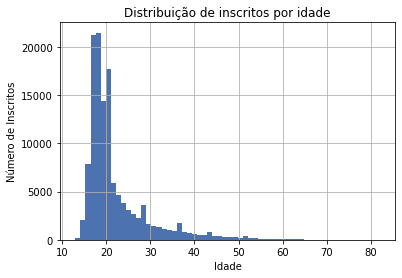

In [7]:
#histograma referente a distribuição de idade dos inscritos
dados['NU_IDADE'].hist(bins = 60)
plt.xlabel('Idade')
plt.ylabel('Número de Inscritos')
plt.title("Distribuição de inscritos por idade")


## Desafio 4: Plotar os histogramas das idades dos treineiros e não treineiros

Text(0.5, 1.0, 'Distribuição por idade  dos inscritos como treineiros ')

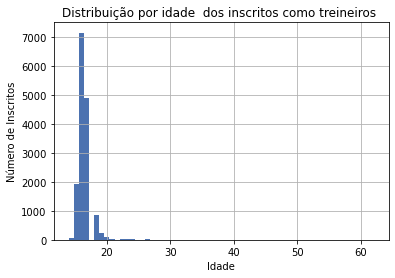

In [8]:
# retorna os candidados inscritos como treineiros
treineiros = dados.query('IN_TREINEIRO == 1')
treineiros['NU_IDADE'].hist(bins = 60)
plt.xlabel('Idade')
plt.ylabel('Número de Inscritos')
plt.title("Distribuição por idade  dos inscritos como treineiros ")


Text(0.5, 1.0, 'Distribuição por idade  dos inscritos como não treineiros ')

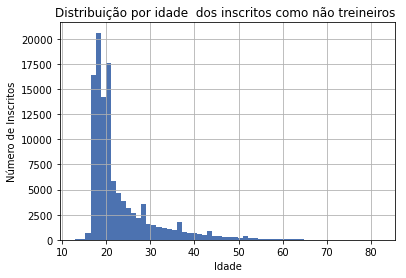

In [9]:
# retorna os candidados inscritos como  não treineiros
n_treineiros = dados.query('IN_TREINEIRO == 0')
n_treineiros['NU_IDADE'].hist(bins = 60)
plt.xlabel('Idade')
plt.ylabel('Número de Inscritos')
plt.title("Distribuição por idade  dos inscritos como não treineiros ")

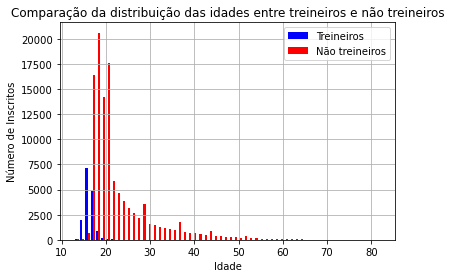

In [10]:
# definição das labels
l=['Treineiros', 'Não treineiros']
#definição das cores
c=['blue','red']

plt.hist([treineiros['NU_IDADE'],n_treineiros['NU_IDADE']], bins = 60,  label = l, color = c)
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Idade')
plt.ylabel('Número de Inscritos')
plt.title("Comparação da distribuição das idades entre treineiros e não treineiros")
plt.show()



## Desafio 5: Comparar as distribuições das provas em inglês e espanhol

Text(0.5, 1.0, 'Espanhol')

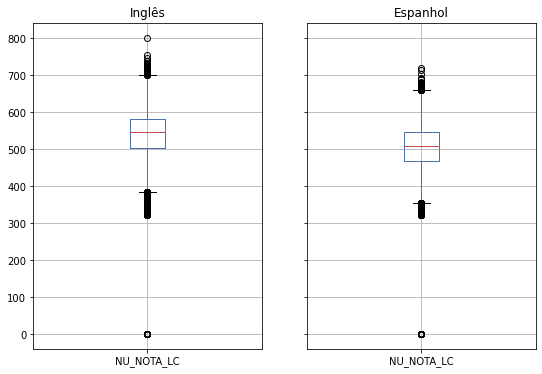

In [11]:
#retorna os inscritos que optaram pela prova de inglês
ingles = dados.query('TP_LINGUA == 0')
#retorna os inscritos que optaram pela prova de espanhol
espanhol = dados.query('TP_LINGUA == 1')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = (True), figsize=(9,6))
ingles['NU_NOTA_LC'].plot.box(ax = ax1, grid=(True))
espanhol['NU_NOTA_LC'].plot.box(ax = ax2, grid=(True))
ax1.set_title('Inglês')
ax2.set_title('Espanhol')



## Desafio 6: Explorar a documentações e visualizações com matplotlib

In [12]:
#retorna o total de inscritos
total = len(dados.NU_INSCRICAO.value_counts())

#proporção dos inscritos por sexo
feminino = dados.query('TP_SEXO == "F"')
masculino = dados.query('TP_SEXO == "M"')

f = feminino['TP_SEXO'].value_counts()/total*100
m = masculino['TP_SEXO'].value_counts()/total*100
print("Porcentagem de inscritos por sexo:")
print ("Feminino %.2f " % f)
print ("Maculino %.2f " % m)

Porcentagem de inscritos por sexo:
Feminino 59.57 
Maculino 40.43 


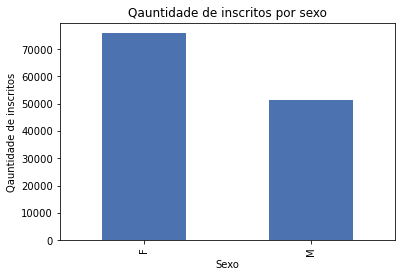

In [13]:
#representação gráfica dos inscritos por sexo
dados.TP_SEXO.value_counts().plot(kind='bar')
plt.title('Qauntidade de inscritos por sexo')
plt.ylabel('Qauntidade de inscritos')
plt.xlabel('Sexo')
plt.show()